# Machine Learning to Predict Titanic Survivors

This notebook is based mainly on the following kaggle blog:
https://www.kaggle.com/ialimustufa/titanic-beginner-s-guide-with-sklearn

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# Read data

In [2]:
training = pd.read_csv("titanic/train.csv")
testing = pd.read_csv("titanic/test.csv")

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### Dealing with missing and NaN values

In [14]:
def null_tables(train_table, test_table):
    print("Train missing values")
    print(train_table.isnull().sum(axis=0))
    print("Total", len(train_table))
    print("")
    
    print("Test missing values")
    print(test_table.isnull().sum(axis=0))
    print("Total", len(test_table))
    print("")

In [15]:
null_tables(training, testing)

Train missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
Total 891

Test missing values
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
Total 418



In [16]:
len(training['Ticket'].unique()), len(testing['Ticket'].value_counts())

KeyError: 'Ticket'

#### Dropping redundant columns (with a lot of missing values or row-unique ones)

In [12]:
training.drop(columns = ['Cabin', 'Ticket'], inplace = True)
testing.drop(columns = ['Cabin', 'Ticket'], inplace = True)

In [17]:
null_tables(training, testing)

Train missing values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
Total 891

Test missing values
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
Total 418



### Distribution of age

<AxesSubplot:xlabel='Age'>

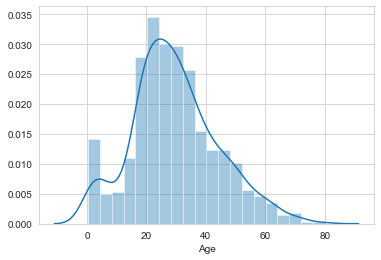

In [44]:
sns.distplot(training.dropna().Age)

Let's solve the skewed tail to the right (or if it was to the left) by filling missing values with the average, this way the "head" in the middle will occupies a larger percentage, and the tail less

In [18]:
training["Age"].fillna(training["Age"].median(), 
                       inplace = True)

<AxesSubplot:xlabel='Age'>

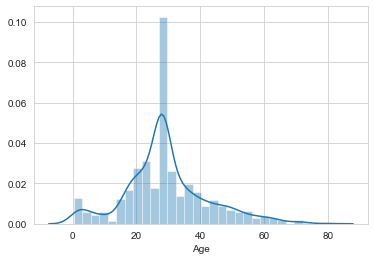

In [19]:
sns.distplot(training.dropna().Age)

#### Let's do it with all cols with missing values

In [20]:
testing.Age.fillna(testing.Age.median(), inplace = True)
testing.Fare.fillna(testing.Fare.median(), inplace = True)

#### Fill with majority in categorical columns

In [21]:
training['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
training.Embarked.fillna('S', inplace = True)

In [23]:
null_tables(training, testing)

Train missing values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Total 891

Test missing values
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
Total 418



----

----

## Data visualization

### 1. Gender

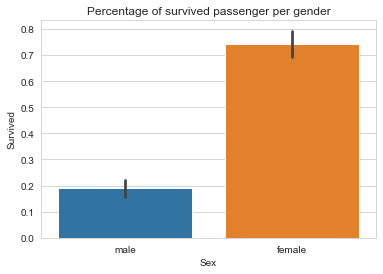

In [25]:
sns.barplot(x='Sex', y='Survived', data=training)
plt.title('Percentage of survived passenger per gender')
plt.show()

In [26]:
survived_df = pd.DataFrame(training.groupby(['Sex', 
                  'Survived'])['PassengerId'].count())

In [32]:
survived_df.reset_index(inplace = True)

In [33]:
survived_df

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [39]:
filt1 = survived_df['Survived']==1
total_survived = survived_df.loc[filt1]['PassengerId'].sum()

filt2 = (filt1) & (survived_df['Sex']=='male')
male_survived = survived_df.loc[filt2]['PassengerId'].sum()

filt3 = (filt1) & (survived_df['Sex']=='female')
female_survived = survived_df.loc[filt3]['PassengerId'].sum()

print(f"Total of {total_survived} survivors:\n" + \
      f"{male_survived/total_survived} % are males\n" +\
      f"{female_survived/total_survived} % are females")

Total of 342 survivors:
0.31871345029239767 % are males
0.6812865497076024 % are females


### 2. Class

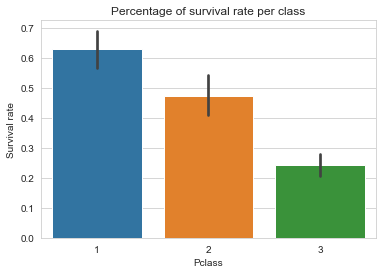

In [40]:
# Seaborn
sns.barplot(x='Pclass', y='Survived', 
            data=training)

# plt additional things
plt.ylabel("Survival rate")
plt.title("Percentage of survival rate per class")
plt.show()

In [60]:
class_surv_df = training.groupby(['Pclass', 
                                  'Survived'])['PassengerId'].count()
class_surv_df = pd.DataFrame(class_surv_df)
class_surv_df.reset_index(inplace = True)
class_surv_df.rename(columns = {'PassengerId': 'counter'},
                    inplace = True)


In [61]:
class_surv_df

,Pclass,Survived,counter
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [66]:
filt1 = (class_surv_df['Survived']==1)

survived_only_df = class_surv_df[filt1]
class_survivors_count = {}

class_1_filt = (class_surv_df['Pclass']==1)
class_survivors_count['1'] = survived_only_df[class_1_filt].counter.sum()

class_2_filt = (class_surv_df['Pclass']==2)
class_survivors_count['2'] = survived_only_df[class_2_filt].counter.sum()

class_3_filt = (class_surv_df['Pclass']==3)
class_survivors_count['3'] = survived_only_df[class_3_filt].counter.sum()

In [68]:
print(class_survivors_count['1'], 
      class_survivors_count['2'],
      class_survivors_count['3'])

136 87 119


In [70]:
total_survivors = survived_only_df.counter.sum()
print(f"Total survivors: {total_survivors}")

x = class_survivors_count['1']
print(f'Class 1 %: {x/total_survivors*100}')

x = class_survivors_count['2']
print(f'Class 2 %: {x/total_survivors*100}')

x = class_survivors_count['3']
print(f'Class 3 %: {x/total_survivors*100}')


Total survivors: 342
Class 1 %: 39.76608187134503
Class 2 %: 25.438596491228072
Class 3 %: 34.7953216374269


#### 2.a. Class-Gender: separate by class

Text(0.5, 1.0, 'Survival rate based per Gender & Class')

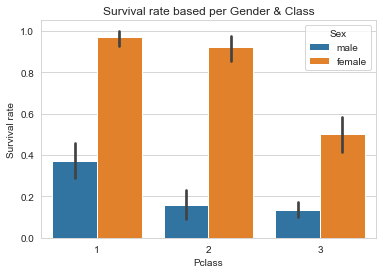

In [71]:
# Seaborn things
sns.barplot(x='Pclass', y='Survived',
           hue='Sex', data = training)

# plt things
plt.ylabel('Survival rate')
plt.title('Survival rate based per Gender & Class')

In [73]:
training.groupby(['Pclass', 
                  'Sex', 
                  'Survived']).agg({'PassengerId': 'count'})

PassengerId
Pclass Sex    Survived             
1      female 0                   3
              1                  91
       male   0                  77
              1                  45
2      female 0                   6
              1                  70
       male   0                  91
              1                  17
3      female 0                  72
              1                  72
       male   0                 300
              1                  47

#### 2.b. Class-gender: separate by gender

Text(0.5, 1.0, 'Survival rate based per Gender & Class')

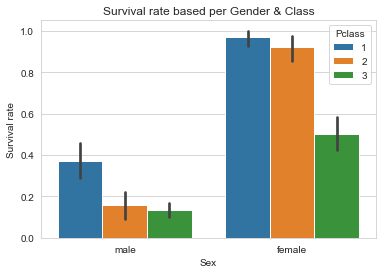

In [74]:
# Seaborn things
sns.barplot(x='Sex', y='Survived',
           hue='Pclass', data = training)

# plt things
plt.ylabel('Survival rate')
plt.title('Survival rate based per Gender & Class')

### Age

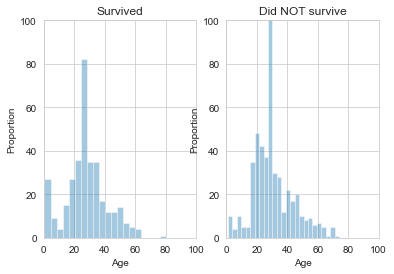

In [91]:
filt1 = (training.Survived == 1)
survived_ages = training[filt1]['Age']

filt2 = (training.Survived == 0)
not_survived_ages = training[filt2]['Age']

plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde = False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")

plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde = False)
plt.axis([0, 100, 0, 100])
plt.title("Did NOT survive")
plt.ylabel("Proportion")

plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

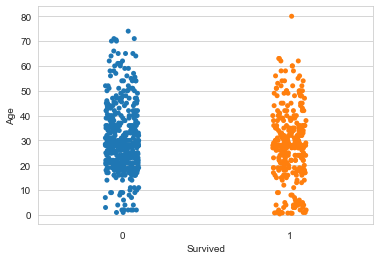

In [87]:
sns.stripplot(x='Survived', 
              y='Age', 
              data = training,
              jitter = True)

### Pair plot

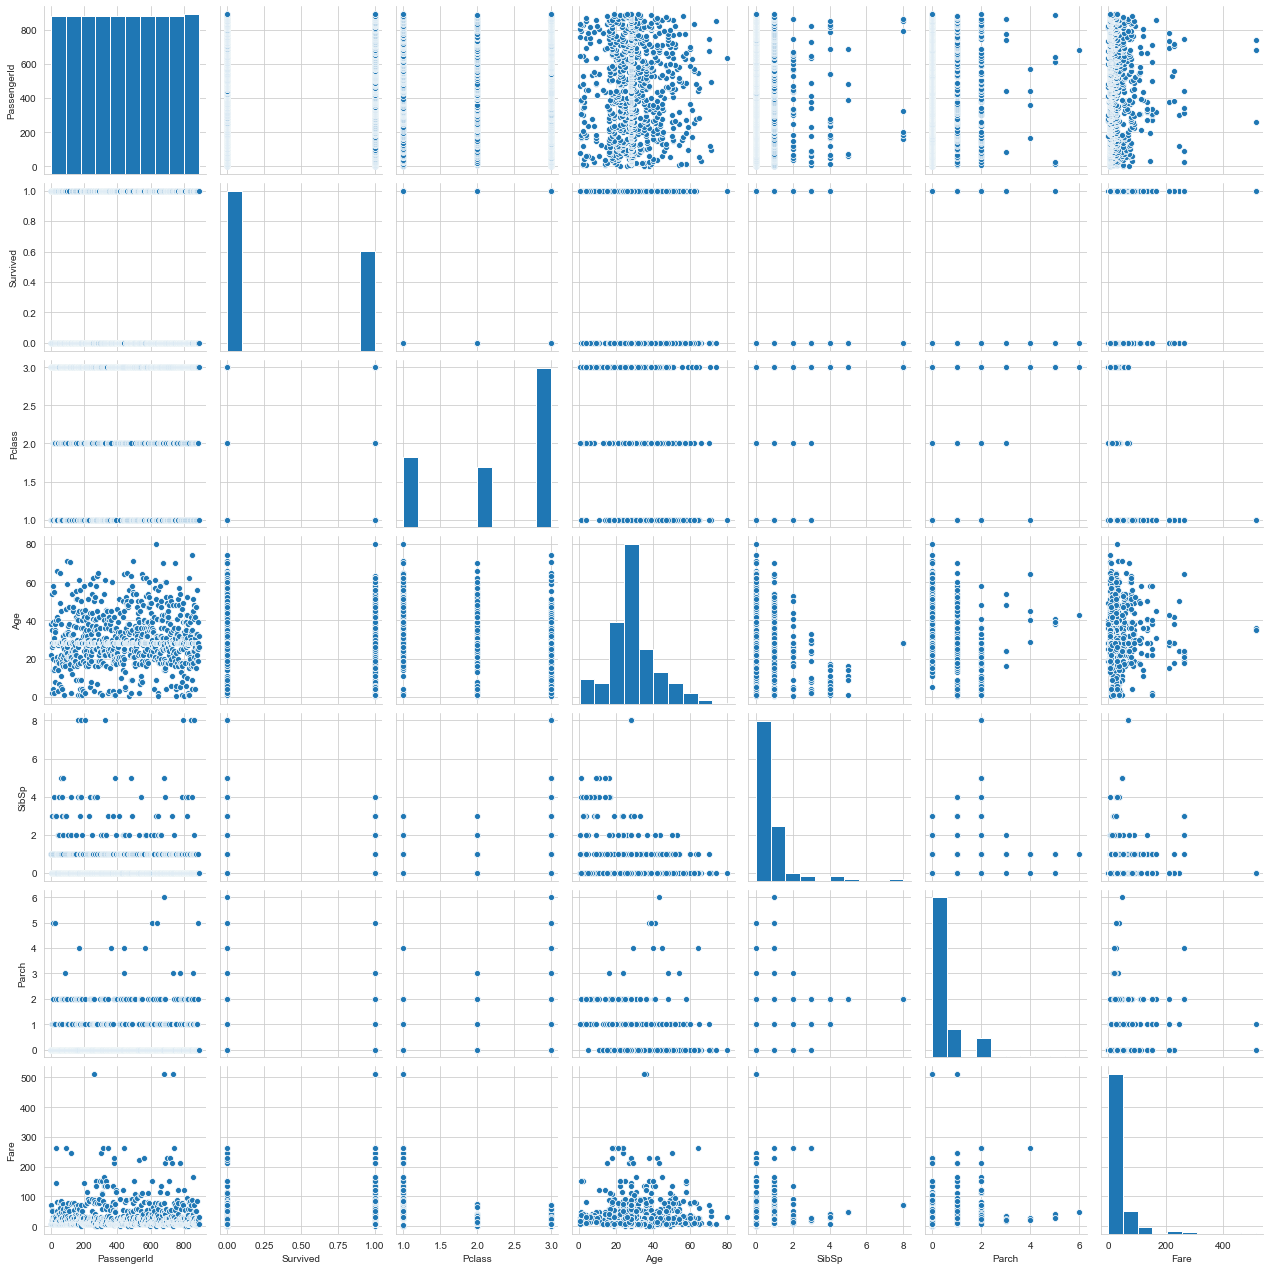

In [92]:
sns.pairplot(training)

----

----

## Feature Engineering

Sex and Embarked columns are categorical, thus we need to represent the different values of each feature in a numerical way to feed it into a model.

We will convert them into one-hot-encoding

In [93]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,12.3500,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,56.9292,C
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,153.4625,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,26.5500,S


In [94]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,27.0,0,0,7.75,Q
162,1054,2,"Wright, Miss. Marion",female,26.0,0,0,13.50,S
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,59.40,C
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,13.00,S
148,1040,1,"Crafton, Mr. John Bertram",male,27.0,0,0,26.55,S


#### Convert to one hot encoding

In [97]:
training.loc[training["Sex"] == 'male', 'Sex'] = 0
training.loc[training["Sex"] == 'female', 'Sex'] = 1

testing.loc[testing["Sex"] == 'male', 'Sex'] = 0
testing.loc[testing["Sex"] == 'female', 'Sex'] = 1

training.loc[training['Embarked'] == 'S', "Embarked"] = 0
training.loc[training['Embarked'] == 'C', "Embarked"] = 1
training.loc[training['Embarked'] == 'Q', "Embarked"] = 2

testing.loc[testing['Embarked'] == 'S', "Embarked"] = 0
testing.loc[testing['Embarked'] == 'C', "Embarked"] = 1
testing.loc[testing['Embarked'] == 'Q', "Embarked"] = 2


In [99]:
testing.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
39,931,3,"Hee, Mr. Ling",0,27.0,0,0,56.4958,0
175,1067,2,"Brown, Miss. Edith Eileen",1,15.0,0,2,39.0000,0
279,1171,2,"Oxenham, Mr. Percy Thomas",0,22.0,0,0,10.5000,0
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1,48.0,1,3,262.3750,1
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,14.4542,0
50,942,1,"Smith, Mr. Lucien Philip",0,24.0,1,0,60.0000,0
199,1091,3,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",1,27.0,0,0,8.1125,0
65,957,2,"Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...",1,27.0,0,0,21.0000,0
194,1086,2,"Drew, Master. Marshall Brines",0,8.0,0,2,32.5000,0
318,1210,3,"Jonsson, Mr. Nils Hilding",0,27.0,0,0,7.8542,0


### Let's add a few features

#### Family size additional feature

In [100]:
training['FamSize'] = training['SibSp'] + training['Parch'] + 1
testing['FamSize'] = testing['SibSp'] + testing['Parch'] + 1

#### Is Alone feature

In [101]:
isAlone = lambda x: 1 if x==1 else 0 
training['IsAlone'] = training['FamSize'].apply(isAlone)
testing['IsAlone'] = testing['FamSize'].apply(isAlone)

#### Maybe

In [113]:
training["Title"] = training.Name.str.extract("([A-Za-z]+)\.", 
                                              expand = True)

testing["Title"] = testing.Name.str.extract("([A-Za-z]+)\.", 
                                            expand = True)


In [118]:
training.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Lady          1
Sir           1
Don           1
Mme           1
Capt          1
Ms            1
Jonkheer      1
Name: Title, dtype: int64

Minimize the options in Title

In [116]:
title_replacements = {"Mlle": "Other", 
                      "Major": "Other", 
                      "Col": "Other", 
                      "Sir": "Other", 
                      "Don": "Other", 
                      "Mme": "Other",
                      "Jonkheer": "Other", 
                      "Lady": "Other", 
                      "Capt": "Other", 
                      "Countess": "Other", 
                      "Ms": "Other", 
                      "Dona": "Other", 
                      "Rev": "Other", 
                      "Dr": "Other"}

In [122]:
training.replace({"Title": title_replacements}, 
                 inplace=True)
testing.replace({"Title": title_replacements}, 
                 inplace=True)

In [123]:
training.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [124]:
testing.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

#### Turn into one-hot-encoding

In [125]:
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

In [126]:
testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

In [127]:
print(set(training["Title"]))

{0, 1, 2, 3, 4}


In [128]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
804,805,1,3,"Hedman, Mr. Oskar Arvid",0,27.0,0,0,6.9750,0,1,1,1
794,795,0,3,"Dantcheff, Mr. Ristiu",0,25.0,0,0,7.8958,0,1,1,1
762,763,1,3,"Barah, Mr. Hanna Assi",0,20.0,0,0,7.2292,1,1,1,1
94,95,0,3,"Coxon, Mr. Daniel",0,59.0,0,0,7.2500,0,1,1,1
665,666,0,2,"Hickman, Mr. Lewis",0,32.0,2,0,73.5000,0,3,0,1


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

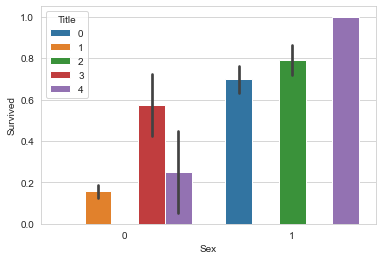

In [132]:
sns.barplot(x='Sex',
            y='Survived',
            hue = 'Title',
           data = training)

----

----

## Models:
### Let's get ready t ruuuuuumble!!

In [133]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [134]:
from sklearn.metrics import make_scorer, accuracy_score 

In [135]:
from sklearn.model_selection import GridSearchCV

In [142]:
from sklearn.metrics import classification_report

In [136]:
features = ["Pclass", "Sex", "Age", "Embarked", 
            "Fare", "FamSize", "IsAlone", "Title"]

# Train set
X_train = training[features] 
y_train = training["Survived"] 

# Test set
X_test = testing[features]

Building a validation set

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train,
                                                           y_train,
                                                           test_size = 0.2,
                                                           random_state = 0)

In [139]:
len(X_training), len(X_valid)

(712, 179)

#### SVC model

In [141]:
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)

In [144]:
acc_svc = accuracy_score(y_valid, pred_svc)
print(acc_svc)

0.7262569832402235

In [145]:
print(classification_report(y_valid, pred_svc))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       110
           1       0.81      0.38      0.51        69

    accuracy                           0.73       179
   macro avg       0.76      0.66      0.66       179
weighted avg       0.75      0.73      0.70       179



#### LinearSVC Model

In [166]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)

In [167]:
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print(acc_linsvc)

0.6368715083798883


#### RandomForest

In [168]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)

In [169]:
acc_rf = accuracy_score(y_valid, pred_rf)

print(acc_rf)

0.8156424581005587


#### LogisticRegression

In [172]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)

In [173]:
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8100558659217877


#### KNeighbors 

In [174]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)

In [175]:
acc_knn = accuracy_score(y_valid, pred_knn)

print(acc_knn)

0.7430167597765364


#### GaussianNB

In [176]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)

In [177]:
acc_gnb = accuracy_score(y_valid, pred_gnb)

print(acc_gnb)

0.7877094972067039


#### DecisionTree

In [178]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)

In [179]:
acc_dt = accuracy_score(y_valid, pred_dt)

print(acc_dt)

0.7821229050279329


-----

----

## Evaluating Model Performances

In [187]:
model_performance = pd.DataFrame({'Model':
                                 ['SVC', 'Linear SVC',
                                 'Random Forest',
                                 'LR','KNN', 
                                  'Gussian NaiveB',
                                 'DecisionT'],
                                 'Accuracy':[acc_svc, 
                                             acc_linsvc, 
                                             acc_rf, 
                                             acc_logreg, 
                                             acc_knn, 
                                             acc_gnb, 
                                             acc_dt]})

model_performance.sort_values(by='Accuracy', 
                              ascending=False)

,Model,Accuracy
2,Random Forest,0.815642
3,LR,0.810056
5,Gussian NaiveB,0.787709
6,DecisionT,0.782123
4,KNN,0.743017
0,SVC,0.726257
1,Linear SVC,0.636872


------

----

## Param Tuning using GridSearch

In [188]:
rf_clf = RandomForestClassifier()

In [189]:
params = {'n_estimators': [4,5,6,7,8,9,10,15],
         'criterion': ['gini', 'entropy'],
         'max_features':['auto', 'sqrt', 'log2'],
         'max_depth': [2, 3, 5, 10],
         'min_samples_split': [2,3,5,10],
         'min_samples_leaf': [1, 5, 8, 10]}

In [191]:
grid_cv = GridSearchCV(rf_clf, 
           params,
           scoring = make_scorer(accuracy_score))

grid_cv = grid_cv.fit(X_train, y_train)

And now the winner is...

In [192]:
print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=9)

#### Creating the model with best params

In [193]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=9)